In [22]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('/Users/siddharth/Code/Python/CustomerChurn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Dropping irrelavant columns

In [25]:
df=df.drop(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'Contract','customerID'], axis=1)

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,Yes,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,42.30,1840.75,No
4,Female,0,No,No,2,Yes,Yes,70.70,151.65,Yes


In [27]:
df.loc[df['gender']=='Male', 'gender']=1
df.loc[df['gender']=='Female', 'gender']=0

df.loc[df['Partner']=='Yes', 'Partner']=1
df.loc[df['Partner']=='No', 'Partner']=0

df.loc[df['Dependents']=='Yes', 'Dependents']=1
df.loc[df['Dependents']=='No', 'Dependents']=0

df.loc[df['PhoneService']=='Yes', 'PhoneService']=1
df.loc[df['PhoneService']=='No', 'PhoneService']=0

df.loc[df['PaperlessBilling']=='Yes', 'PaperlessBilling']=1
df.loc[df['PaperlessBilling']=='No', 'PaperlessBilling']=0

ind = df[df['TotalCharges']==' '].index
df.drop(ind , inplace=True)

df.loc[df['Churn']=='Yes', 'Churn']=1
df.loc[df['Churn']=='No', 'Churn']=0

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,29.85,29.85,0
1,1,0,0,0,34,1,0,56.95,1889.5,0
2,1,0,0,0,2,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,1,70.70,151.65,1


In [28]:
df=df.apply(pd.to_numeric)
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
PaperlessBilling      int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [29]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.011902,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691
PaperlessBilling,-0.011902,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454
MonthlyCharges,-0.013779,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858
TotalCharges,0.000048,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484
Churn,-0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000


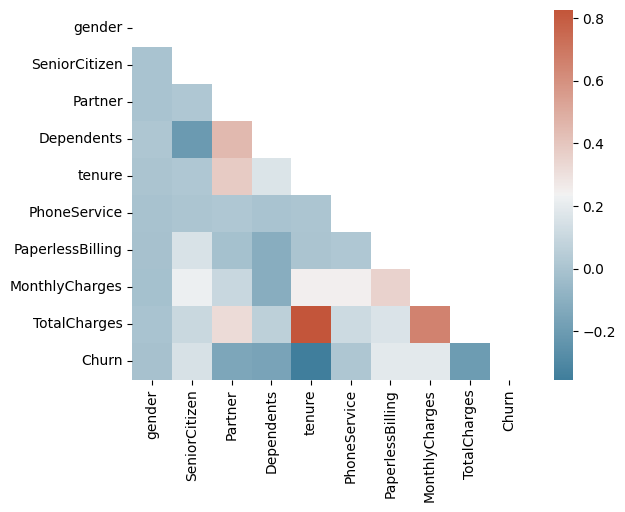

In [30]:
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

dataplot = sns.heatmap(corr, cmap=cmap, mask=mask)

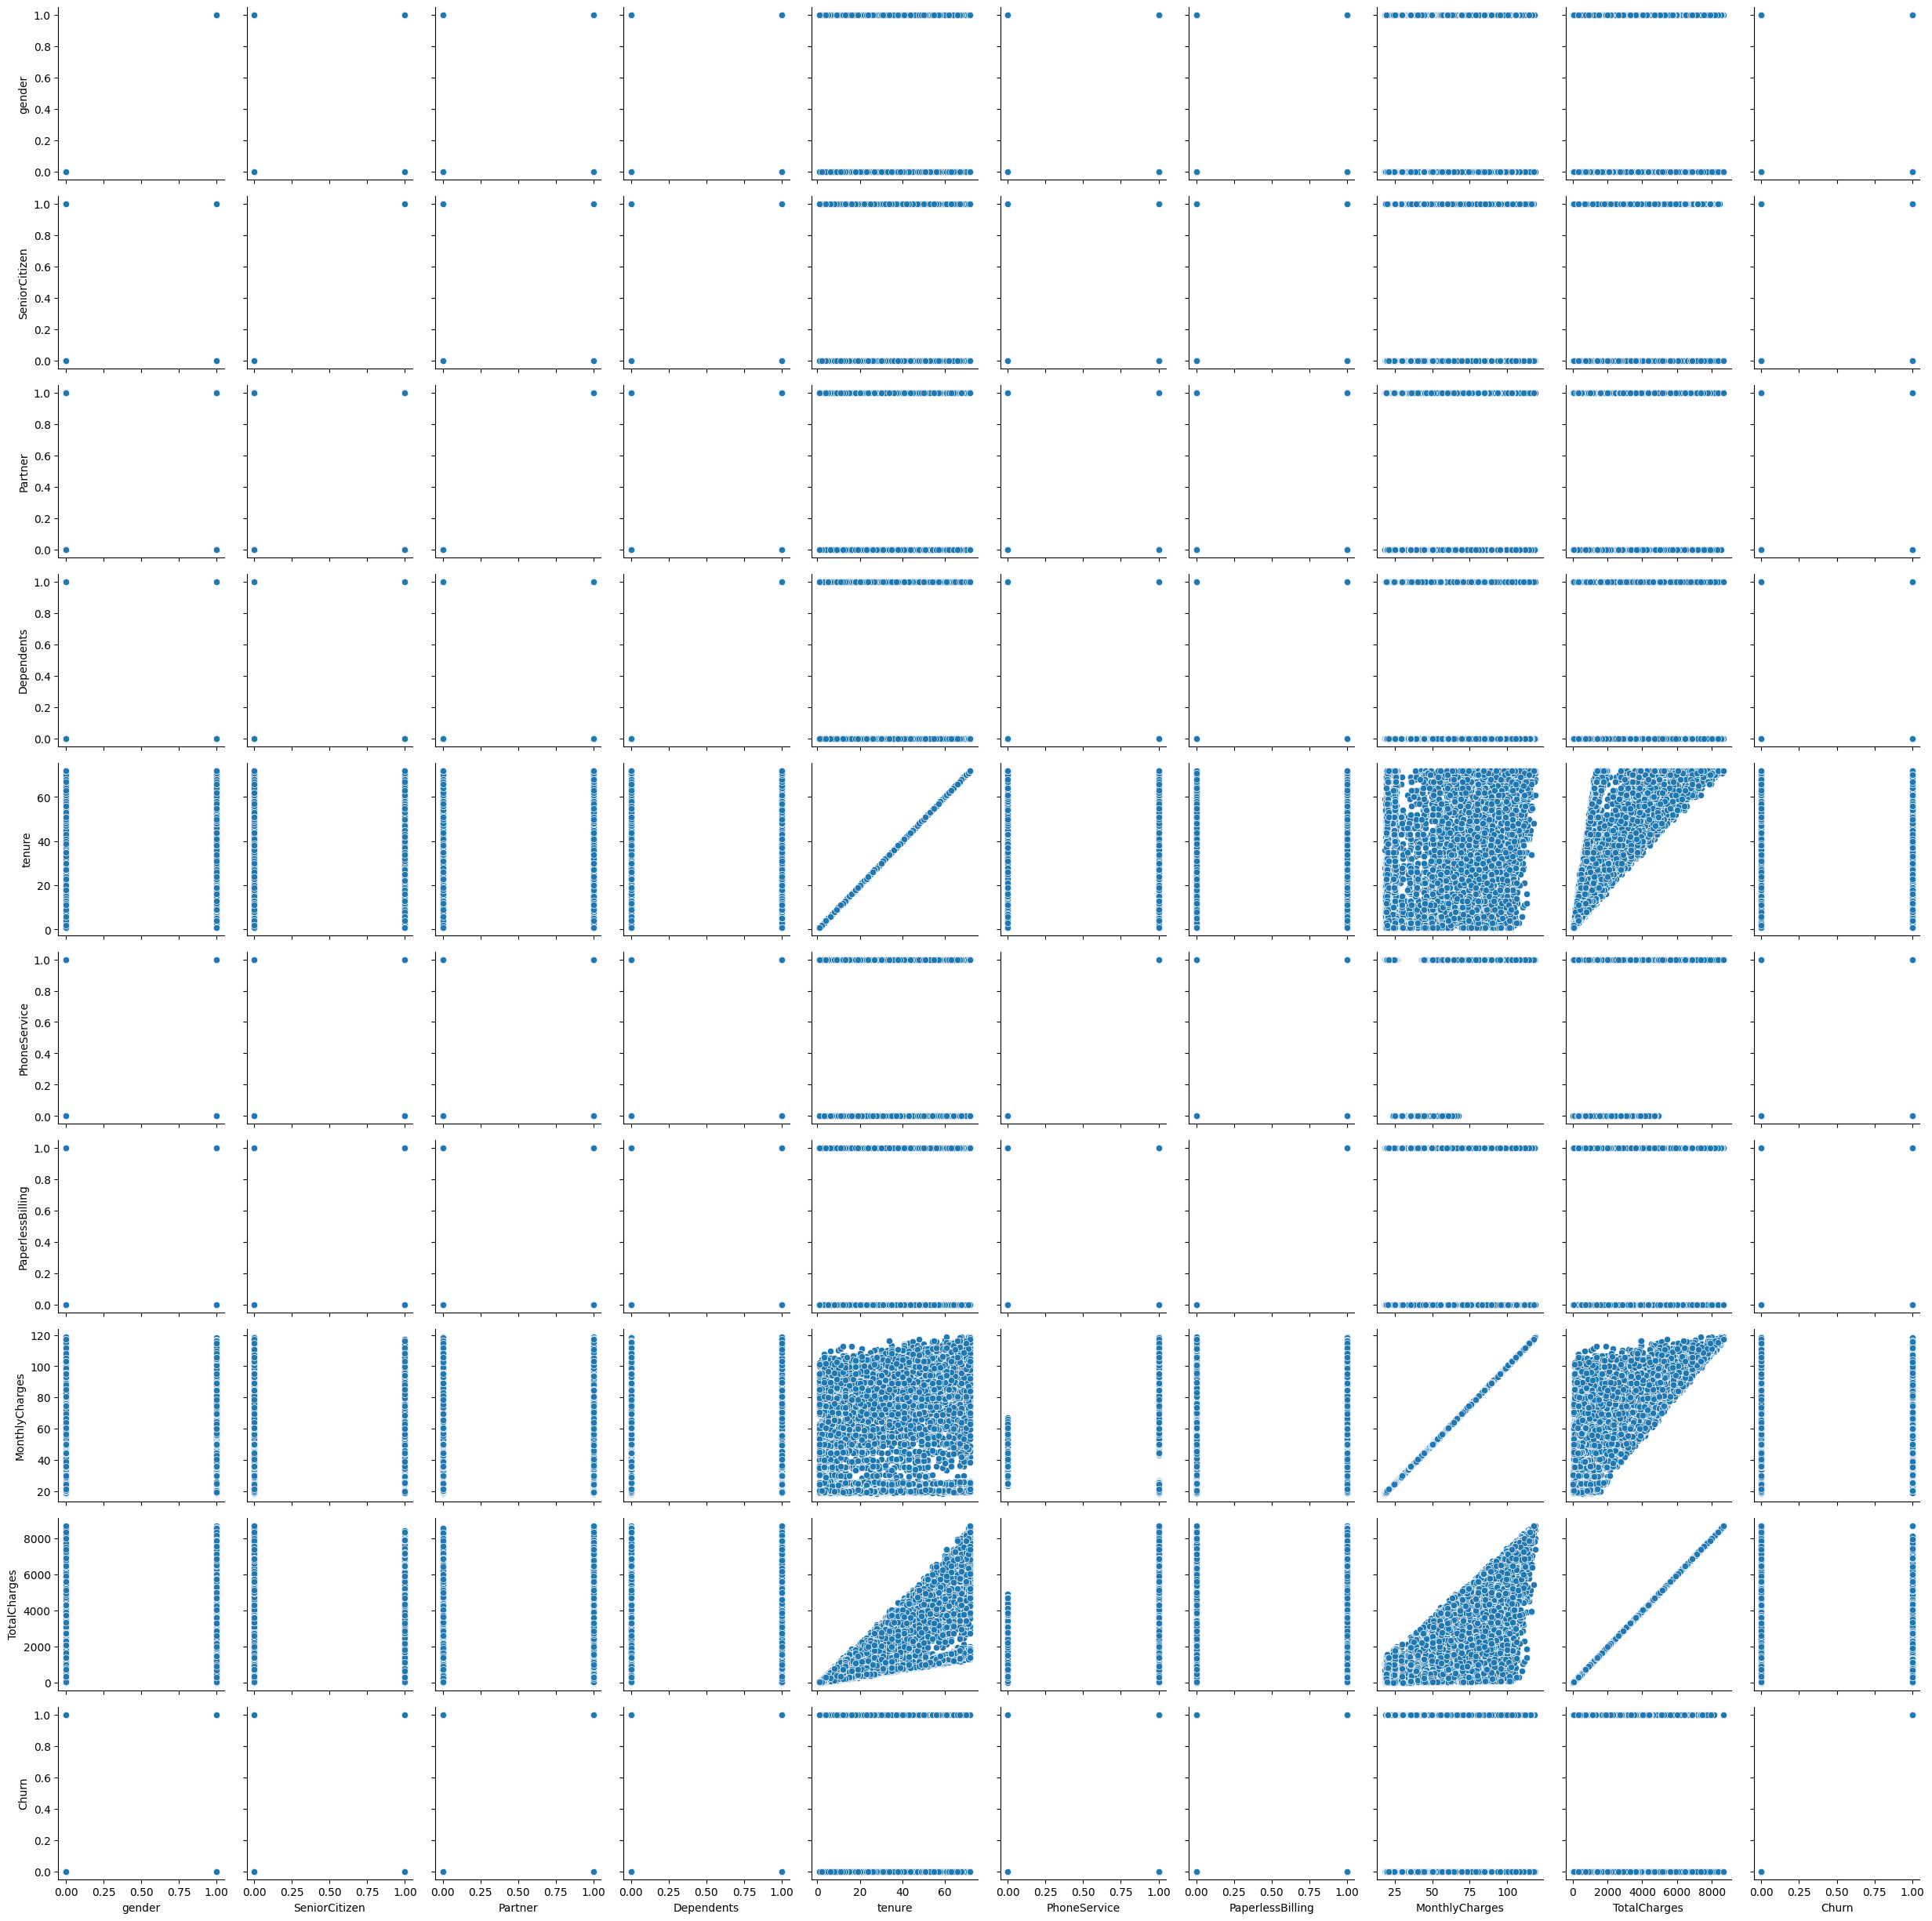

In [32]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2)

5625

## Linear Regression model

In [39]:
train_predictors = train.drop(['Churn'], axis=1)
train_target = train.drop(list(train_predictors), axis=1)

test_predictors = test.drop(['Churn'], axis=1)
test_target = test.drop(list(test_predictors), axis=1)

print(train_predictors.head())
print(train_target.head())

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService   
4159       0              1        0           0      59             1  \
3417       0              0        1           1       8             1   
1933       1              0        0           0      20             1   
2634       1              0        1           0       1             1   
4868       0              0        1           0      37             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  
4159                 1           89.75        5496.9  
3417                 0           56.30         401.5  
1933                 1           19.70         415.9  
2634                 1           84.80          84.8  
4868                 1           99.50        3762.0  
      Churn
4159      0
3417      0
1933      0
2634      1
4868      1


In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_predictors, train_target)

train_predictions = lr.predict(train_predictors)
train_predictions

array([[0.2300353 ],
       [0.3211313 ],
       [0.17257768],
       ...,
       [0.24449713],
       [0.37547216],
       [0.56040151]])

In [42]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(train_target, train_predictions)))

0.3845150858233262


In [43]:
print(metrics.r2_score(train_target, train_predictions))

0.24837975695763603


In [44]:
print(metrics.mean_absolute_error(train_target, train_predictions))

0.30961877422319517
